# Innealta Capital Blended Benchmarks Challenge

# J.T. Flume

## Import Libraries

In [115]:
import pandas as pd
from datetime import datetime
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\John Flume\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['datetime', 'indices']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [99]:
df = pd.read_excel('Interview Challenge - Blended Benchmarks.xlsx')
df

,Ticker,Date,Return
0,Index 1,1979-12-31,0.001048
1,Index 1,1980-01-02,-0.020222
2,Index 1,1980-01-03,-0.006496
3,Index 1,1980-01-04,0.013491
4,Index 1,1980-01-07,0.003757
...,...,...,...
36964,Index 5,2021-03-24,-0.000565
36965,Index 5,2021-03-25,-0.002111
36966,Index 5,2021-03-26,-0.000918
36967,Index 5,2021-03-29,-0.002805


## Clean dataframe for usability

In [100]:
# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36969 entries, 0 to 36968
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Ticker  36969 non-null  object        
 1   Date    36969 non-null  datetime64[ns]
 2   Return  36969 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 866.6+ KB


In [101]:
# Make Indices into columns of corresponding returns for each date
# This makes returns comparable and able to be processed in a for loop for each date to create a portfolio
df = df.pivot_table(index=['Date'],columns='Ticker',values='Return')
df

Ticker,Index 1,Index 2,Index 3,Index 4,Index 5
Date,,,,,
1979-12-31,0.001048,NaN,NaN,-0.004755,NaN
1980-01-02,-0.020222,NaN,NaN,0.008506,NaN
1980-01-03,-0.006496,NaN,NaN,0.003899,NaN
1980-01-04,0.013491,NaN,NaN,-0.002374,NaN
1980-01-07,0.003757,NaN,NaN,-0.013065,NaN
...,...,...,...,...,...
2021-03-24,-0.008045,-0.011439,-0.001987,0.027818,-0.000565
2021-03-25,0.006739,-0.002808,0.003066,-0.025150,-0.002111
2021-03-26,0.016524,0.011950,0.015082,0.025345,-0.000918


## Target Weights

In [102]:
weight1, weight2, weight3, weight4, weight5 = .175, .2, .05, .075, .5

## Filter Dates

In [103]:
# Time Frame from 2006-01-01 to 2020-12-31
df = df.loc['2006-01-01':'2020-12-31']
df

Ticker,Index 1,Index 2,Index 3,Index 4,Index 5
Date,,,,,
2006-01-02,NaN,0.002102,0.000867,NaN,NaN
2006-01-03,0.015784,0.018978,0.016391,0.015399,0.006417
2006-01-04,0.004512,0.018118,0.008779,0.000970,0.008793
2006-01-05,0.000637,0.000781,0.004324,-0.014597,0.001227
2006-01-06,0.009717,0.009834,0.006673,0.013558,0.003731
...,...,...,...,...,...
2020-12-25,NaN,0.000588,0.000049,NaN,-0.000064
2020-12-28,0.005483,0.003686,0.006399,-0.007006,-0.000207
2020-12-29,-0.003940,0.011591,-0.000192,0.007100,0.002933


## The assumption is made that dropping missing rows is reasonable as only 145 rows are dropped because each index is using the same days for all of their actual values. However, if we wanted a more precise look from day to day we could fill missing values with an average of the closest values to always be able to see day to day movement. 

In [104]:
# Only 145 rows dropped with missing values, could also fill na's with average of two closest dates
df = df.dropna()
df

Ticker,Index 1,Index 2,Index 3,Index 4,Index 5
Date,,,,,
2006-01-03,0.015784,0.018978,0.016391,0.015399,0.006417
2006-01-04,0.004512,0.018118,0.008779,0.000970,0.008793
2006-01-05,0.000637,0.000781,0.004324,-0.014597,0.001227
2006-01-06,0.009717,0.009834,0.006673,0.013558,0.003731
2006-01-09,0.004495,-0.000365,0.001339,-0.011840,-0.001979
...,...,...,...,...,...
2020-12-24,0.002783,0.000474,0.007579,0.000324,0.000851
2020-12-28,0.005483,0.003686,0.006399,-0.007006,-0.000207
2020-12-29,-0.003940,0.011591,-0.000192,0.007100,0.002933


In [105]:
# indices = list(df.columns)
# indices

In [106]:
df.index.quarter.unique()

Int64Index([1, 2, 3, 4], dtype='int64', name='Date')

## Anothing assumption we make is that all portfolios are priced the same when rebalancing or that their is no cost to rebalancing since we don't have price information on the indices.

# Next the portfolio is created.

### Portfolio creation walkthrough:
A function is created that takes a dataframe and the target weights. 

From this a new dataframe is created from the existing dataframe that will be populated with the investment value and the growth from returns.

The first row is given the value of the investment times the targetted weights because this is the day we make our investment at each weight, so we don't realize gains from the returns for that day. The next day we will have growth or losses from the returns.

The returns are calculated by multiplying the previous day's value of the investment by 1 + the return for the day. A new column is created to keep track of the cumulative returns of the entire portfolio.

Next we update the investment about to be this cumulative return value. On each first day of a new quarter the row is updated to be the target weights times the cumulative value of the portfolio. The process of the portfolio growing is then repeated until the next unique quarter day, which is then rebalanced again.

In [107]:
def get_portfolio(df=df, weight1=.175, weight2=.2, weight3=.05, weight4=.075, weight5=.5):
  returns_df = df.copy() #create a df to be populated with values that depend on previous df
  results_df = pd.DataFrame(columns=['Index 1', 'Index 2', 'Index 3', 'Index 4', 'Index 5']) #create columns minus tickers
  inv = 100 #our investment of $100
  for year in returns_df.index.year.unique()[0:]:
        temp_df = returns_df[returns_df.index.year == year] #create temp df to be iterated on
        for quarter in temp_df.index.quarter.unique(): #we want to iterate over each quarter and then create a new row at the beg of each quarter
          quarter_df = temp_df[temp_df.index.quarter == quarter] #another temp df to be iterated on
          quarter_df.iloc[0] = [weight1 * inv, weight2 * inv, weight3 * inv, weight4 * inv, weight5 * inv] #The first row is the value invested in each index according to target weight (returns for this day are ignored)
          for i in range(1, len(quarter_df)):
            quarter_df.iloc[i] = quarter_df.iloc[i-1] * (quarter_df.iloc[i] + 1) #Each day of each quarter takes the previous row (which is a value for each index) and multiplies by 1 + today's return
          inv = quarter_df.iloc[-1].sum() #The new investment amount is updated to be the sum of index values
          results_df = results_df.append(quarter_df) #The results are added to the actual df we want of the portfolio

  results_df['cumulative_returns'] = results_df.apply(np.sum, axis = 1) #A new column is created to show cumulative portfolio return
  return results_df

In [108]:
#Create a portfolio dataframe from the get_portfolio() function which returns a results_df named portfolio
portfolio = get_portfolio()
portfolio

,Index 1,Index 2,Index 3,Index 4,Index 5,cumulative_returns
2006-01-03,17.500000,20.000000,5.000000,7.500000,50.000000,100.000000
2006-01-04,17.578960,20.362360,5.043895,7.507275,50.439650,100.932140
2006-01-05,17.590158,20.378263,5.065705,7.397691,50.501539,100.933356
2006-01-06,17.761081,20.578663,5.099508,7.497989,50.689961,101.627202
2006-01-09,17.840917,20.571152,5.106336,7.409213,50.589645,101.517264
...,...,...,...,...,...,...
2020-12-24,35.000033,40.501774,9.775081,15.341562,91.044135,191.662585
2020-12-28,35.191938,40.651064,9.837632,15.234079,91.025289,191.940001
2020-12-29,35.053282,41.122250,9.835743,15.342241,91.292266,192.645782
2020-12-30,35.148977,41.380375,9.895524,15.461527,91.541494,193.427897


## Now let's check if we are rebalancing correctly at the start of the quarter

In [109]:
# The last quarter date of October 1st
portfolio.iloc[-64]

Index 1                31.031644
Index 2                35.464736
Index 3                 8.866184
Index 4                13.299276
Index 5                88.661839
cumulative_returns    177.323678
Name: 2020-10-01 00:00:00, dtype: float64

In [110]:
#A list of the latest index investments and the total return value
growth = list(portfolio.iloc[-64][0:5])
total = portfolio.iloc[-64][-1]

In [111]:
#Take each current index value at the beg of the quarter and divide by the cumulative return value
for i in range(0,len(growth)):
    print(growth[i]/total)

0.17500000000000002
0.20000000000000004
0.05000000000000001
0.07500000000000001
0.5000000000000001


In [114]:
print(weight1)
print(weight2)
print(weight3)
print(weight4)
print(weight5)

0.175
0.2
0.05
0.075
0.5


## Successful rebalancing at that quarter date. The value of each index divided by the cumulative portfolio value is equal to the target weights.

# Graphs

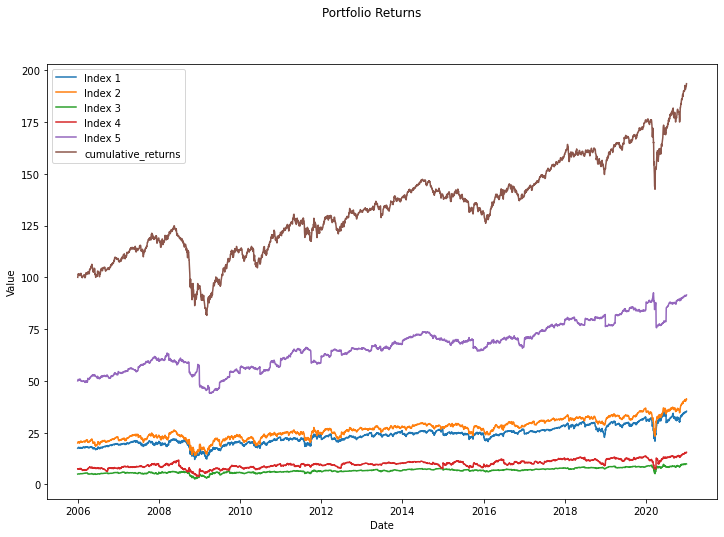

In [127]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (12,8))
plt.plot(portfolio)
fig.suptitle('Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(portfolio.columns, loc='best')

Text(0, 0.5, 'Value')

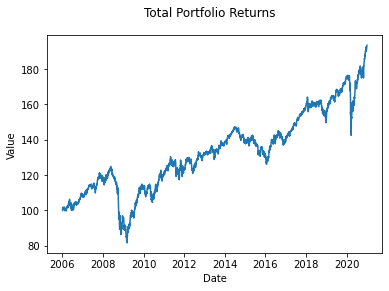

In [128]:
fig = plt.figure()
plt.plot(portfolio['cumulative_returns'])
fig.suptitle('Total Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Value')

In [129]:
portfolio.to_csv('Blended Benchmarks Challenge.csv')